In [1]:
#https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
dtypes = {
        'f_00':'float32',
        'f_01': 'float32',
        'f_02':'float32',
        'f_03': 'float32',
        'f_04':'float32',
        'f_05': 'float32',
        'f_06':'float32',
        'f_07': 'int8',
        'f_08':'int8',
        'f_09': 'int8',
        'f_10':'int8',
        'f_11': 'int8',
        'f_12':'int8',
        'f_13': 'int8',
        'f_14':'float32',
        'f_15': 'float32',
        'f_16':'float32',
        'f_17': 'float32',
        'f_18':'float32',
        'f_19': 'float32',
        'f_20':'float32',
        'f_21': 'float32',
        'f_22':'float32',
        'f_23': 'float32',
        'f_24':'float32',
        'f_25': 'float32',
        'f_26':'float32',
        'f_27': 'float32',
        'f_28':'float32',
        'f_29': 'float32',
         }
df = pd.read_csv('../data/raw/data.csv')
df.dtypes

id        int64
f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

In [30]:
int_cols = []
float_cols = []
for c,t in zip([col for col in df.columns], [col for col in df.dtypes]):
    if 'int' in str(t):
        int_cols.append(c)
    elif 'float' in str(t):
        float_cols.append(c)
    else:
        print(f'something went wrong for {c}')



In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,98000.0,48999.500000,28290.307527,0.000000,24499.750000,48999.500000,73499.250000,97999.000000
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000


# First impressions:
- f_00 to f_06 (float variabls) all seem to have mu = 0, sd = 1 approximately (standard normal)
- This is also approx the case for f_14 to f_21
- f_21 to f_28 seem to be a bit different, as the mu deviates a little more from 0, and the sd is clearly not 1. 
- f_07 to f_13 are different anyways, where f_09 jumps out due to large sd.

# Check correlation between variables

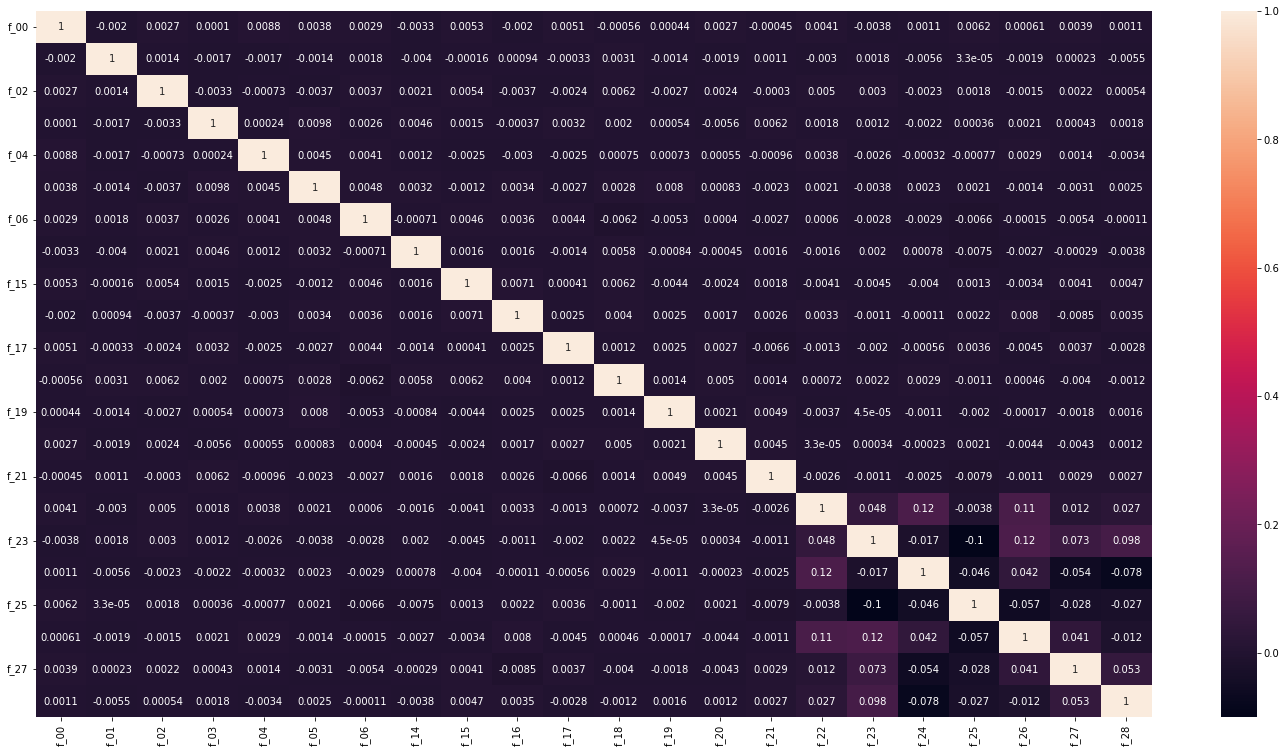

In [71]:
correlation_mat = df[float_cols].corr()
sns.heatmap(correlation_mat, annot = True)
plt.gcf().set_size_inches(25, 13)

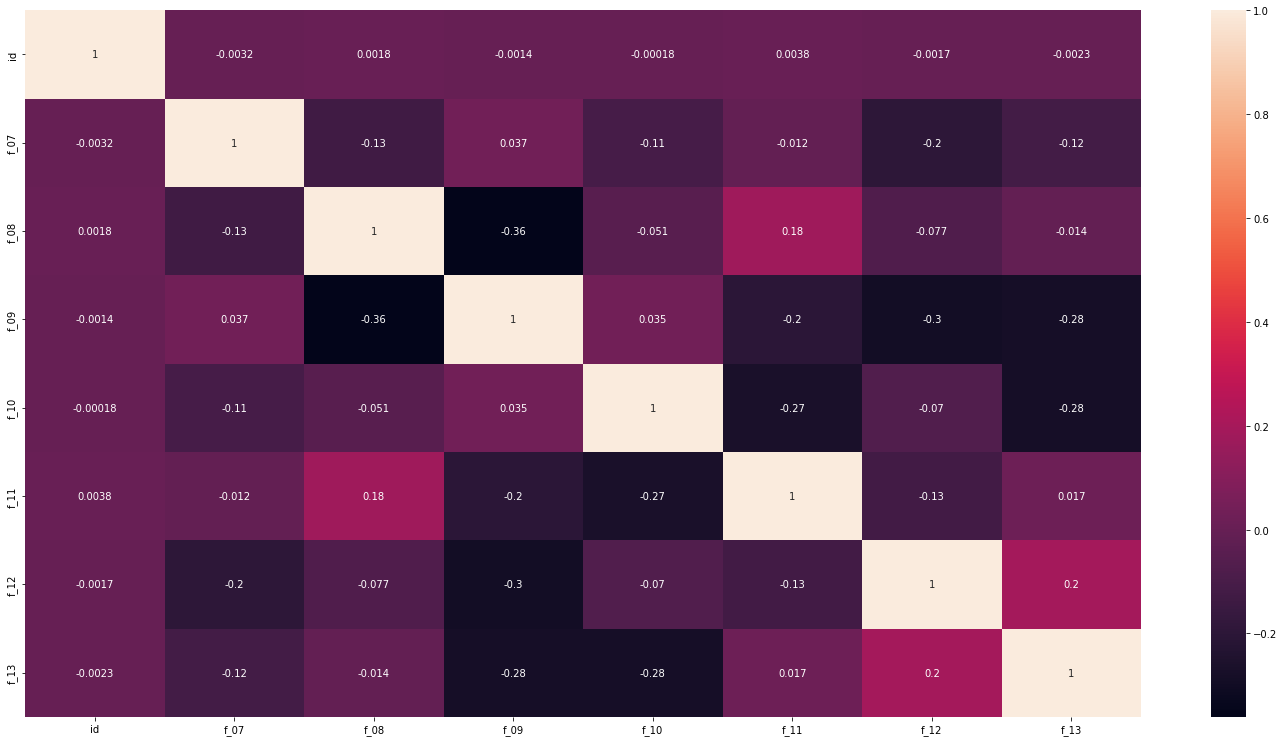

In [73]:
correlation_mat = df[int_cols].corr()
sns.heatmap(correlation_mat, annot = True)
plt.gcf().set_size_inches(25, 13)

- No strong correlations found in float variables, some very weak ones in the int variables (however, those are less reliable due to the nature of pearson correlation coefficient.

# Next up: check distribution for float variables.

(array([5.000e+00, 1.000e+00, 7.000e+00, 1.900e+01, 3.800e+01, 6.900e+01,
        1.560e+02, 3.000e+02, 5.330e+02, 8.940e+02, 1.344e+03, 2.046e+03,
        2.969e+03, 4.077e+03, 5.232e+03, 6.188e+03, 7.418e+03, 8.189e+03,
        8.677e+03, 8.860e+03, 8.397e+03, 7.530e+03, 6.414e+03, 5.400e+03,
        4.287e+03, 3.136e+03, 2.182e+03, 1.453e+03, 9.200e+02, 5.680e+02,
        3.390e+02, 1.760e+02, 9.400e+01, 4.400e+01, 2.900e+01, 5.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-4.30076681, -4.07548975, -3.85021269, -3.62493562, -3.39965856,
        -3.17438149, -2.94910443, -2.72382737, -2.4985503 , -2.27327324,
        -2.04799618, -1.82271911, -1.59744205, -1.37216498, -1.14688792,
        -0.92161086, -0.69633379, -0.47105673, -0.24577967, -0.0205026 ,
         0.20477446,  0.43005153,  0.65532859,  0.88060565,  1.10588272,
         1.33115978,  1.55643684,  1.78171391,  2.00699097,  2.23226804,
         2.4575451 ,  2.68282216,  2.90809923,  3.13337629,  3.3

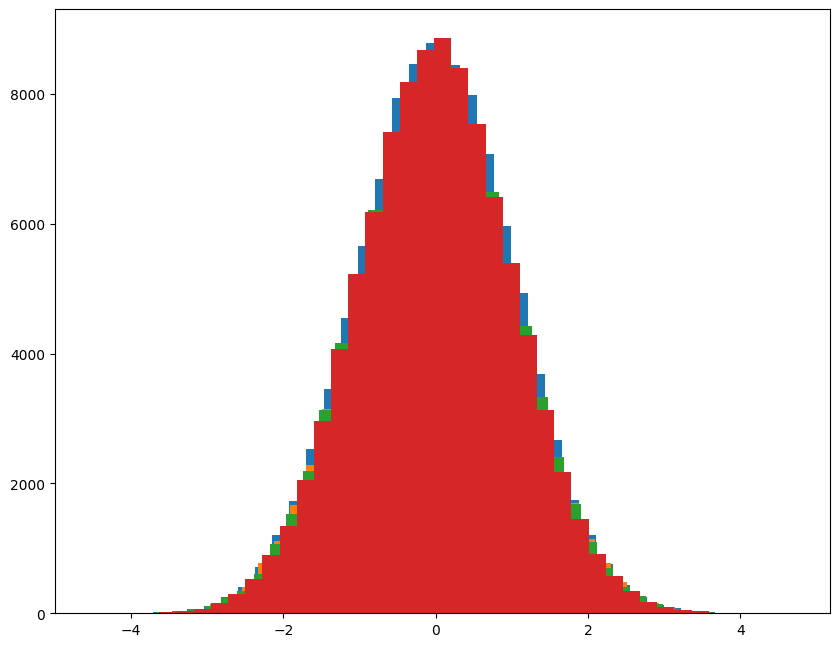

In [127]:
x = df['f_02']
plt.hist(x, bins=40)

x = df['f_03']
plt.hist(x, bins=40)

x = df['f_04']
plt.hist(x, bins=40)

x = df['f_05']
plt.hist(x, bins=40)

(array([6.000e+00, 2.000e+00, 5.000e+00, 1.200e+01, 3.400e+01, 6.600e+01,
        1.210e+02, 2.190e+02, 4.050e+02, 6.540e+02, 1.064e+03, 1.632e+03,
        2.616e+03, 3.722e+03, 4.919e+03, 6.545e+03, 7.615e+03, 8.731e+03,
        8.922e+03, 9.019e+03, 8.225e+03, 7.695e+03, 6.529e+03, 5.369e+03,
        4.187e+03, 3.197e+03, 2.226e+03, 1.614e+03, 1.037e+03, 6.420e+02,
        4.130e+02, 2.640e+02, 1.450e+02, 7.000e+01, 3.600e+01, 2.000e+01,
        1.200e+01, 5.000e+00, 3.000e+00, 2.000e+00]),
 array([-6.95415141, -6.60586888, -6.25758635, -5.90930382, -5.56102129,
        -5.21273876, -4.86445623, -4.5161737 , -4.16789117, -3.81960864,
        -3.47132611, -3.12304358, -2.77476105, -2.42647852, -2.07819599,
        -1.72991346, -1.38163093, -1.0333484 , -0.68506587, -0.33678334,
         0.01149919,  0.35978172,  0.70806425,  1.05634678,  1.40462931,
         1.75291184,  2.10119437,  2.4494769 ,  2.79775943,  3.14604196,
         3.49432449,  3.84260702,  4.19088955,  4.53917208,  4.8

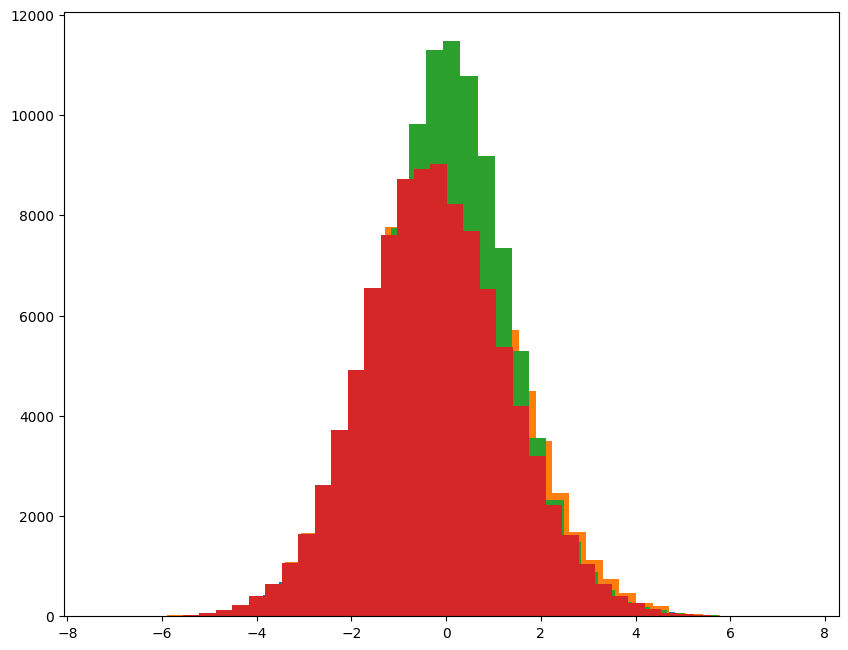

In [128]:
x = df['f_22']
plt.hist(x, bins=40)

x = df['f_23']
plt.hist(x, bins=40)

x = df['f_24']
plt.hist(x, bins=40)

x = df['f_25']
plt.hist(x, bins=40)

x = df['f_26']
plt.hist(x, bins=40)

x = df['f_27']
plt.hist(x, bins=40)

x = df['f_28']
plt.hist(x, bins=40)

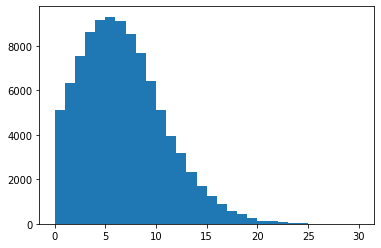

In [13]:
#cols = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
cols = ['f_13']
for col in cols:
    x = df[col]
    plt.hist(x, bins=30)

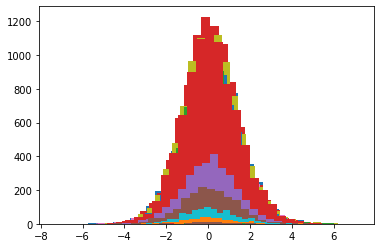

In [28]:
col_1 = 'f_27'
col_2 = 'f_13'
df_test = df[[col_1, col_2]]

for filt in df_test[col_2].unique().tolist():
    x = df[df[col_2] == filt][col_1]
    plt.hist(x, bins=30)

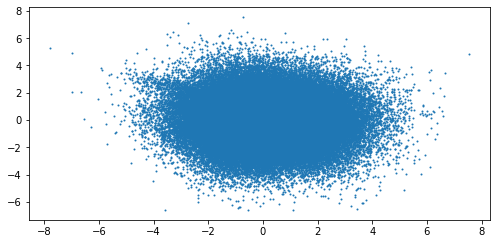

In [94]:
x = df['f_24']
y = df['f_25']

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y, s=1)

In [126]:
"""
Shapiro-wilk: null-hypothesis states the variable is normally distributed.
scipy docs: 

The algorithm used is described in [4] but censoring parameters as described are not implemented. For N > 5000 the W test statistic is accurate but the p-value may not be.

The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.
"""
not_reject_list = []
reject_list = []
alpha = 0.05 #95% confidence interval
for col in float_cols:
    p_value = stats.shapiro(df[col]).pvalue
    if p_value >= alpha:
        not_reject_list.append(col)
    else:
        print(p_value)
        reject_list.append(col)
print(f'We have no evidence {len(not_reject_list)} columns are not normally distributed.')
print(f'{len(reject_list)} columns reject null hypothesis, are not normally distributed')
reject_list

5.754254799701045e-16
6.267770590734356e-13
9.434243253281238e-08
9.014024701262268e-17
4.429073159694591e-36
1.8635848995188873e-36
2.838907449854146e-20
We have no evidence 15 columns are not normally distributed.
7 columns reject null hypothesis, are not normally distributed


['f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']

- Clearly, a lot of normality going on. We could also argue for the rejected cases based on the plots.

In [106]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

covariance_type_list = ['full', 'tied', 'diag', 'spherical']
component_list = [i for i in range(2,10)]
result_list = {}
top_score = 1000000000
for component in component_list:
    for covariance_type in covariance_type_list:
        X = df[float_cols]
        gm = GaussianMixture(n_components=component,covariance_type=covariance_type, random_state=0).fit(X)
        pred = gm.predict(X)
        score = gm.bic(X)
        result_list[component] = score
        if score <= top_score:
            top_score = score
            print(f'n_components {component} has best score with {top_score} for covariance_type {covariance_type}')

n_components 2 has best score with 6644702.4924184065 for covariance_type full
n_components 3 has best score with 6644088.927484468 for covariance_type full
n_components 5 has best score with 6643738.594743412 for covariance_type full
n_components 6 has best score with 6642296.405292482 for covariance_type full
n_components 6 has best score with 6641469.986535679 for covariance_type diag
n_components 7 has best score with 6640092.550417523 for covariance_type diag
n_components 8 has best score with 6639278.138398262 for covariance_type diag
n_components 9 has best score with 6638665.578073534 for covariance_type diag


In [86]:
from random import sample
cols= sample(float_cols,5)
X = df[cols]
gm = GaussianMixture(n_components=10, random_state=0).fit(X)
pred = gm.predict(X)
score = gm.bic(X)
score

1463556.8618689647

In [103]:
from random import sample
cols= sample(float_cols,5)
X = df[['f_24', 'f_25']]
gm = GaussianMixture(n_components=5, random_state=0).fit(X)
pred = gm.predict(X)
score = gm.bic(X)
score

730502.6882875463

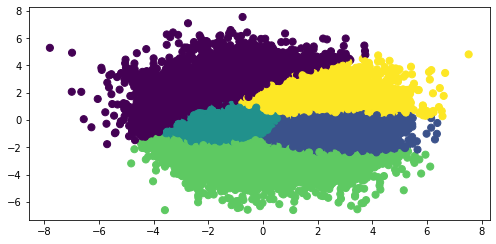

In [104]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x = X['f_24']
y = X['f_25']
Cluster = pred
centers = np.random.randn(4, 2)

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y, c=Cluster, s=50)

plt.show()

In [114]:
submission_df = pd.DataFrame({'Id': df['id'].tolist(), 'Predicted': pred})



In [115]:
submission_df

,Id,Predicted
0,0,3
1,1,7
2,2,6
3,3,7
4,4,7
...,...,...
97995,97995,4
97996,97996,0
97997,97997,3
97998,97998,4
